# generate_countries.ipynb

(c) 2021 Raphael Wimmer <raphael.wimmer@ur.de>
Released under CC-0 license (do what you want with it)

Generate fake time series data (mobility/mortality) for countries based on simple control point lists.

Exports Excel files.
To be used with the `savaris_covid_annotated.ipynb` processing pipeline.

**Attention:** 

a) For the datasets in the `datasets/` folder, I forgot to set a fixed seed for the random number generator. Therefore, these are slightly different from the datasets generated on each run of this notebook. 

b) This notebook creates Excel files in the current folder, whereas the `savaris_covid.ipynb` loads the files from the dataset folder. This is by design to avoid inadvertent modifications.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import statsmodels.api as sm
from pylab import polyfit

In [2]:
# Create reproducable noise
np.random.seed(0)

## Generate model/random countries

In [3]:
# helper function
def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    copy = iterable[1:]    
    return zip(iterable, copy)

In [4]:
def make_country(name, mobility_changes, mortality_changes, wobble=1.0):
        epi_week = range(8,35)
        mortality = np.zeros(27)
        mobility =  np.zeros(27)
        for (now, val1), (then, val2) in pairwise(mobility_changes):
            for i in range(now, then+1):
                mobility[i] = val1 + ((i-now) * (val2 - val1) / (then - now))
        for (now, val1), (then, val2) in pairwise(mortality_changes):
            for i in range(now, then+1):
                mortality[i] = val1 + ((i-now) * (val2 - val1) / (then - now))
        mortality = mortality + np.random.rand(27) * wobble
        mobility = mobility + np.random.rand(27) * wobble
        plt.plot(epi_week, mobility)
        plt.plot(epi_week, mortality)
        plt.ylabel("decrease in mobility compared to baseline (blue)\ndeaths per million (orange)")
        plt.xlabel("epidemiological week")
        plt.title(name)
        plt.savefig("images/" + name.replace("\n", " - ") + ".pdf", format="pdf")
        plt.show()
        #plt.scatter(mobility, mortality)
        #plt.show()
        country = [name] * 27
        df = pd.DataFrame(list(zip(country,epi_week,epi_week,mobility,mortality)), columns = ['location', 'epi-week', 'date', 'Stay-at-home', 'new_deaths_per_million'])
        return df

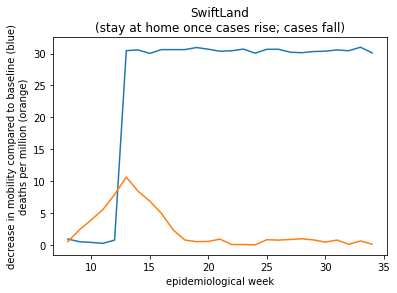

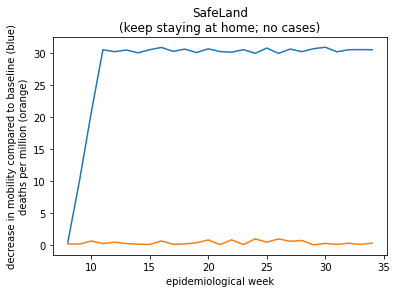

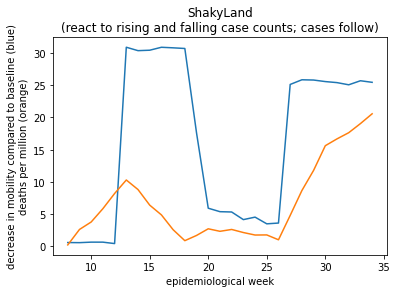

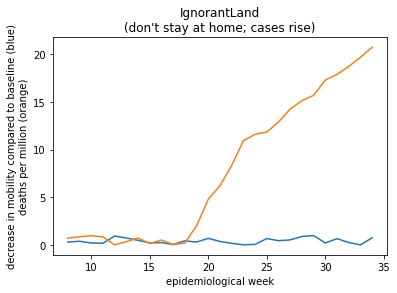

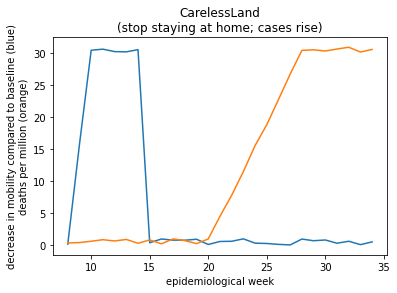

In [5]:
good1 = make_country("SwiftLand\n(stay at home once cases rise; cases fall)", [(0,0), (4,0), (5, 30), (26,30)], [(0,0), (3,5), (5,10), (10,0)])
good2 = make_country("SafeLand\n(keep staying at home; no cases)", [(0,0), (3, 30), (26,30)], [(0,0), (26,0)])
medium1 = make_country("ShakyLand\n(react to rising and falling case counts; cases follow)", [(0,0), (4,0), (5, 30), (10,30), (12,5), (18,3), (19,25), (26,25)], [(0,0), (3,5), (5,10), (10,0),(12,2), (18,1), (22,15), (26,20)])
bad1 = make_country("IgnorantLand\n(don't stay at home; cases rise)", [(0,0), (26, 0)], [(0,0), (10,0), (15,10), (26,20)])
bad2 = make_country("CarelessLand\n(stop staying at home; cases rise)", [(0,0), (2,30), (6, 30), (7, 0), (26, 0)], [(0,0), (12,0), (20,30), (26,30)])


In [6]:
df = pd.concat([good1,good2,medium1,bad1,bad2])
df.to_excel(r'CovidSavaris_Test_only_working_lockdown_with_wobble.xlsx')

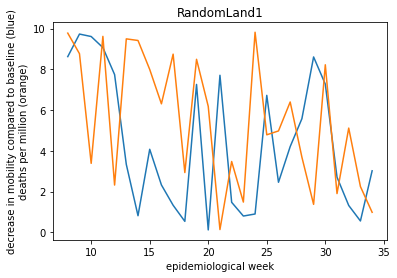

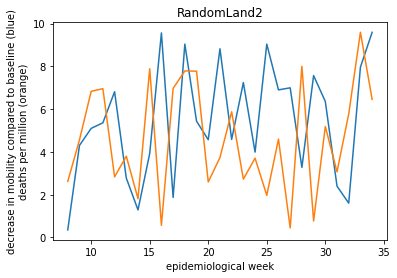

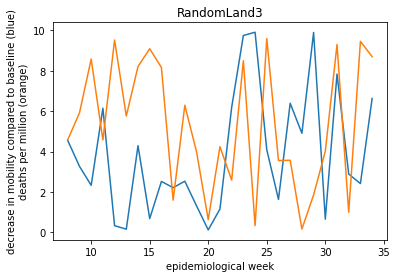

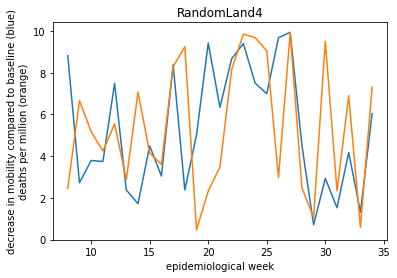

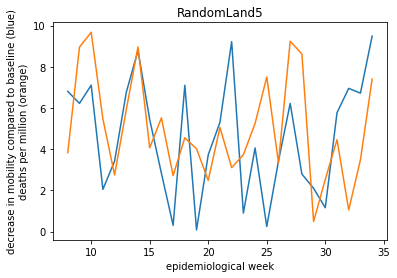

In [7]:
rand1 = make_country("RandomLand1", [(0,0), (26,0)], [(0,0), (26,0)], wobble=10)
rand2 = make_country("RandomLand2", [(0,0), (26,0)], [(0,0), (26,0)], wobble=10)
rand3 = make_country("RandomLand3", [(0,0), (26,0)], [(0,0), (26,0)], wobble=10)
rand4 = make_country("RandomLand4", [(0,0), (26,0)], [(0,0), (26,0)], wobble=10)
rand5 = make_country("RandomLand5", [(0,0), (26,0)], [(0,0), (26,0)], wobble=10)

In [8]:
df = pd.concat([rand1,rand2,rand3,rand4,rand5])
df.to_excel(r'CovidSavaris_Test_only_random.xlsx')

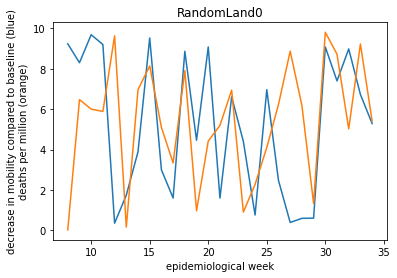

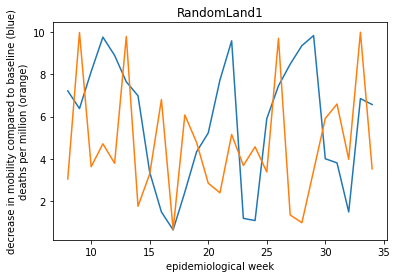

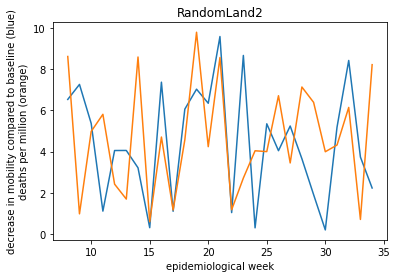

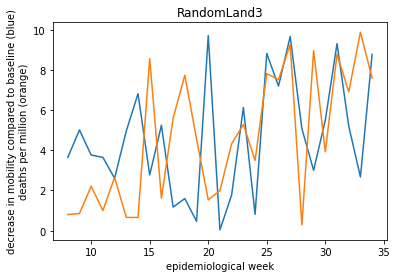

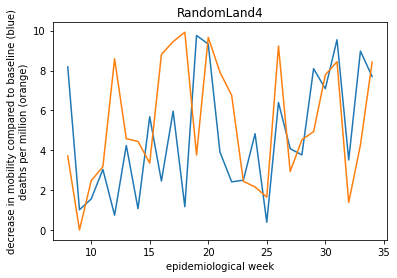

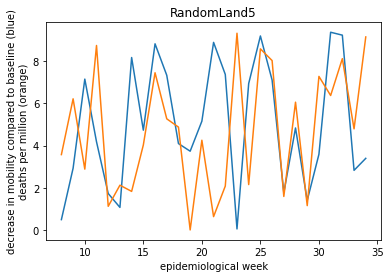

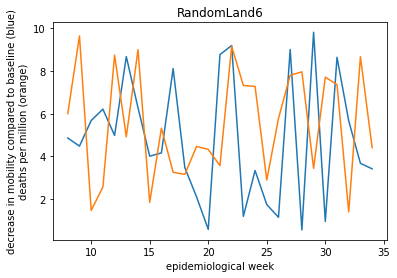

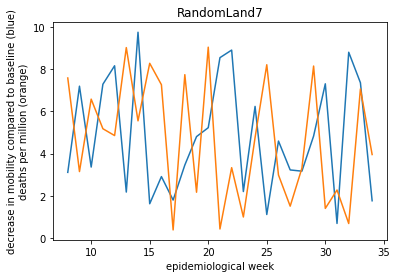

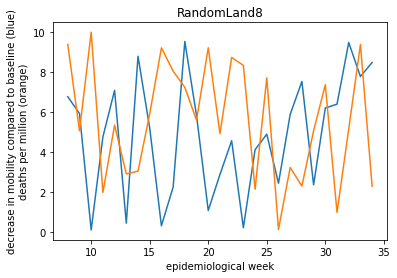

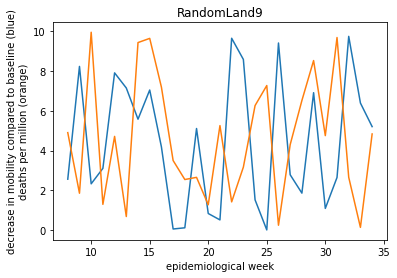

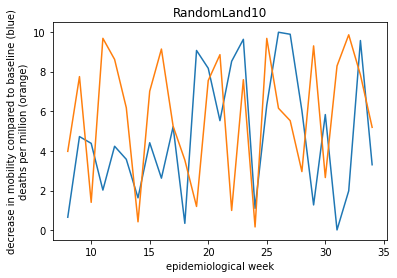

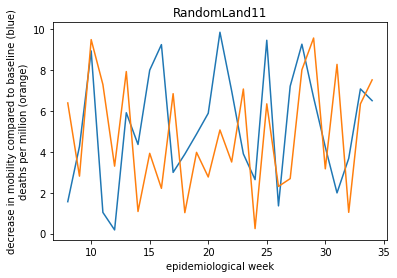

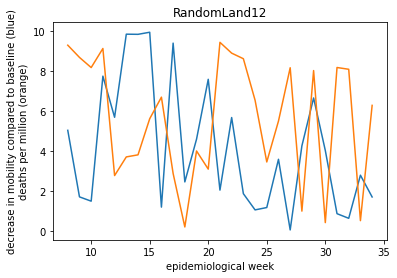

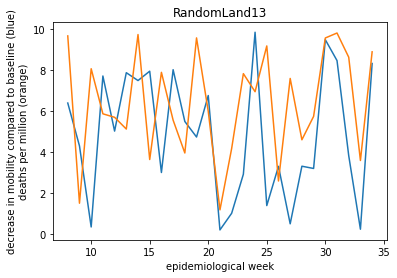

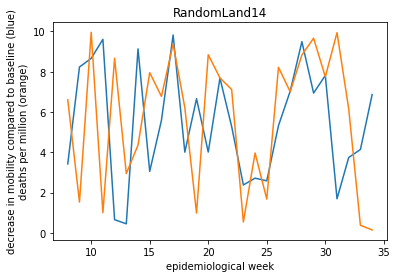

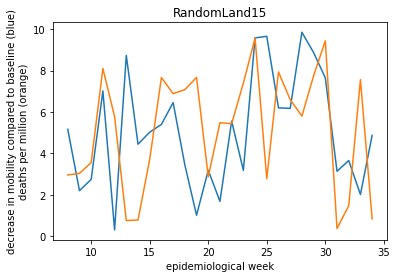

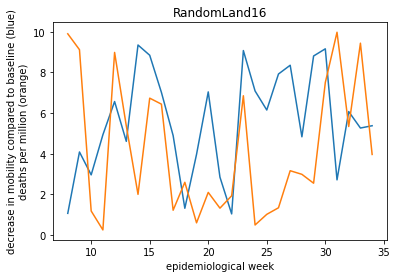

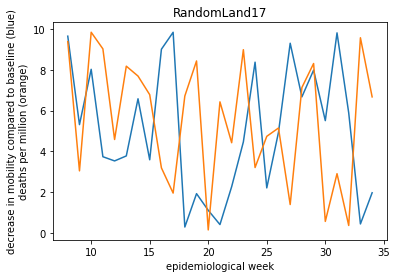

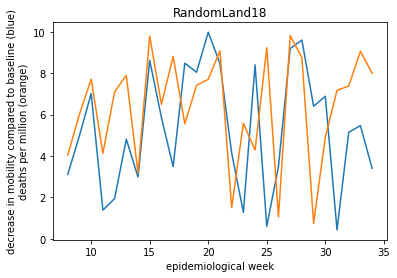

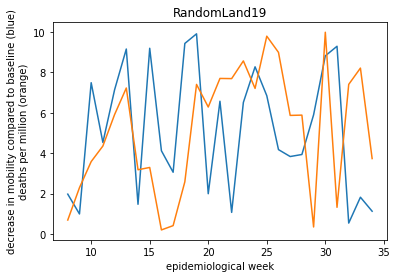

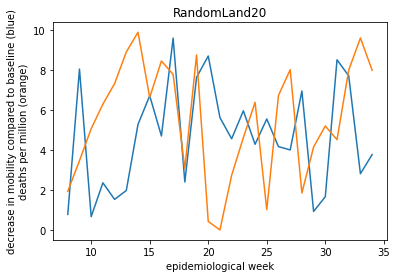

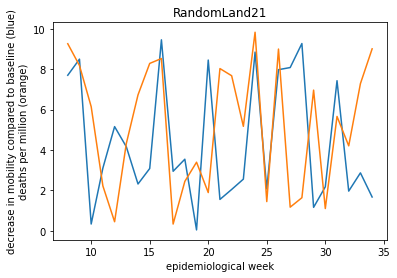

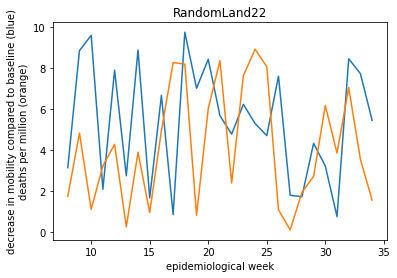

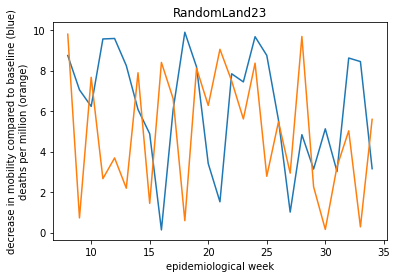

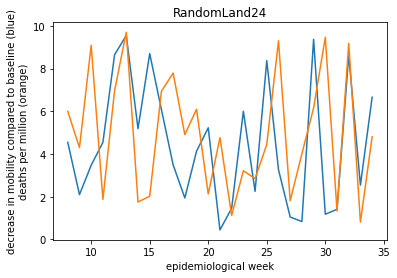

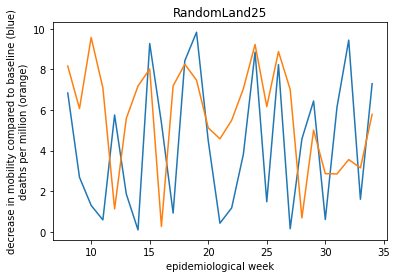

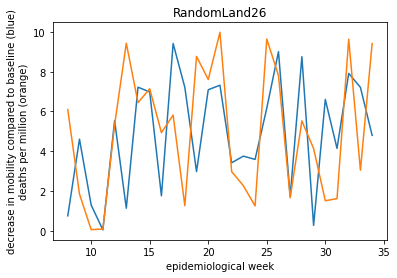

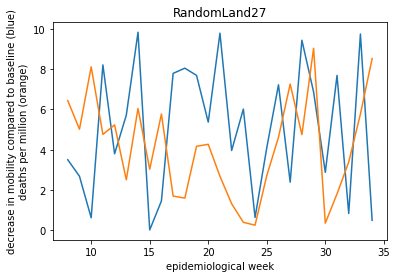

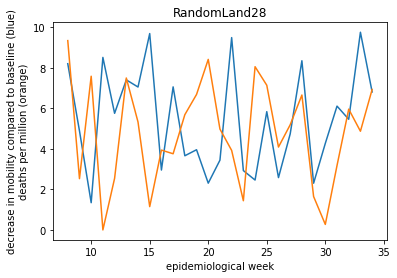

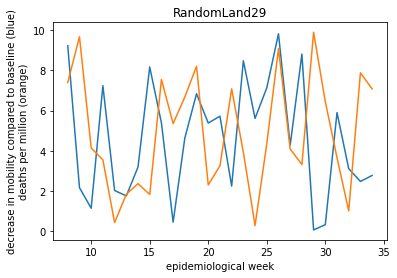

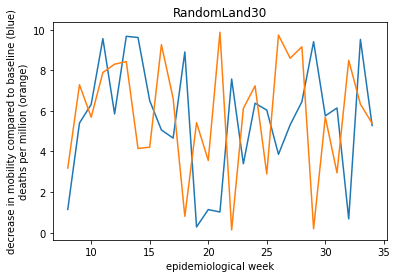

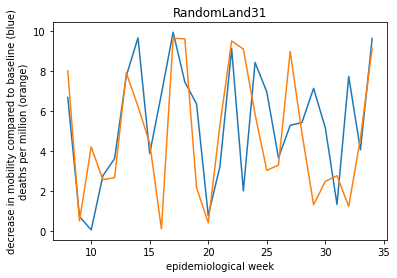

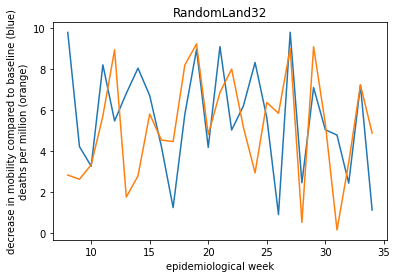

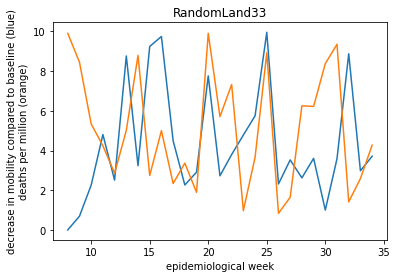

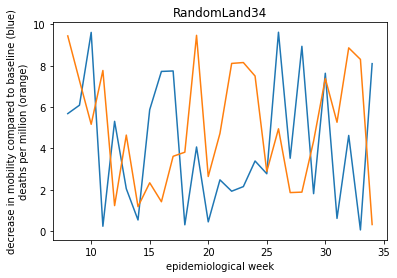

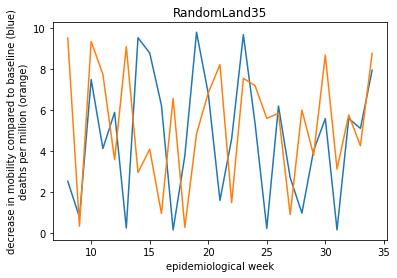

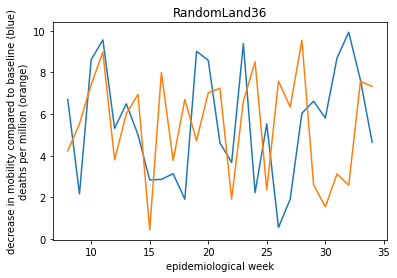

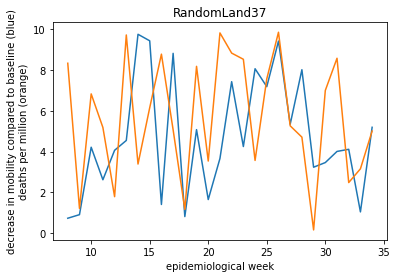

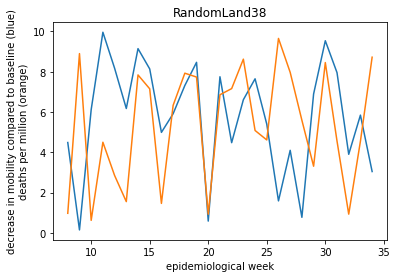

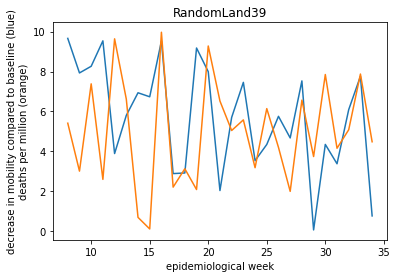

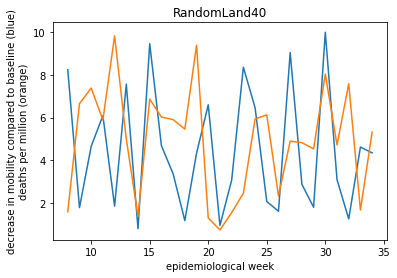

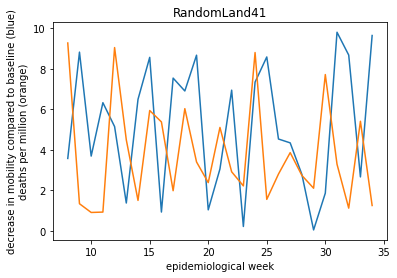

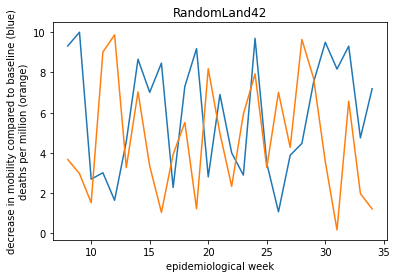

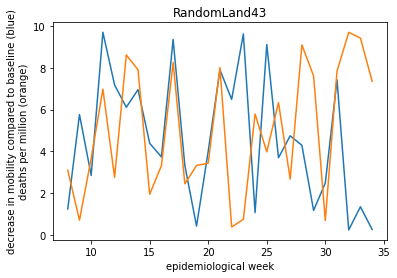

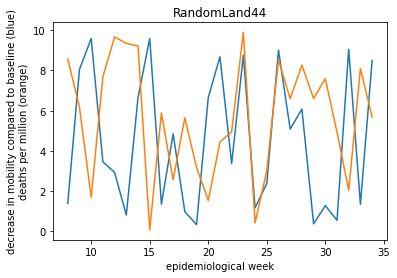

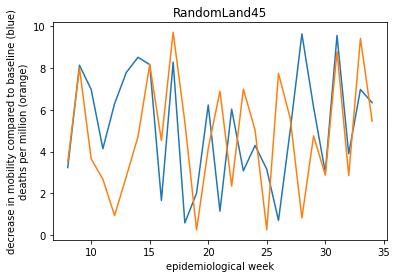

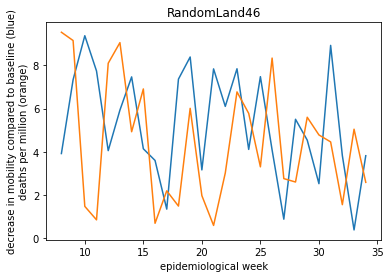

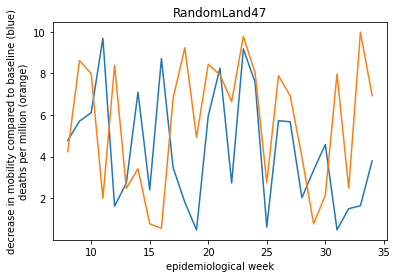

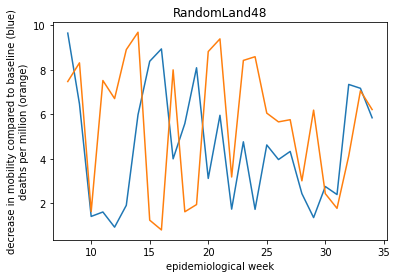

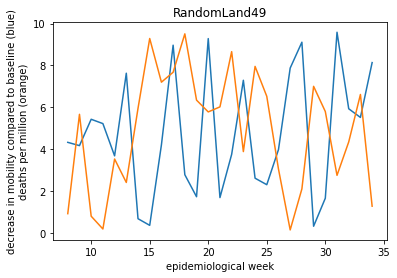

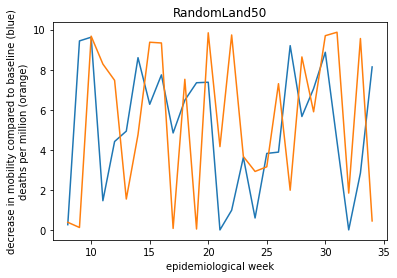

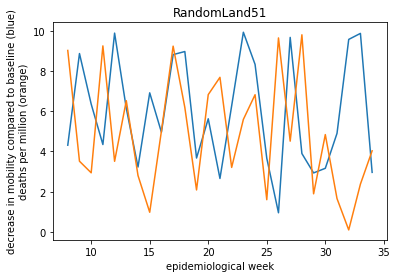

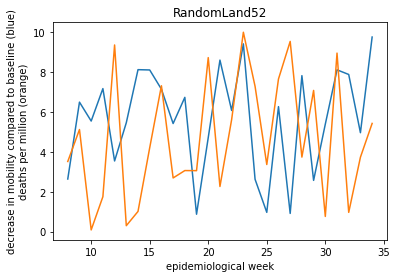

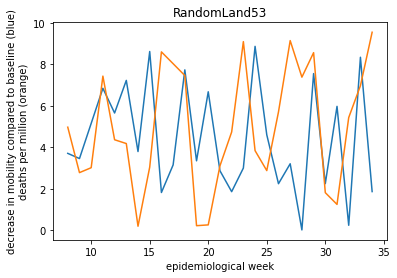

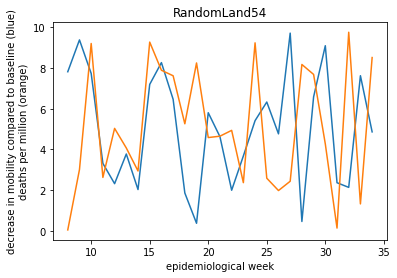

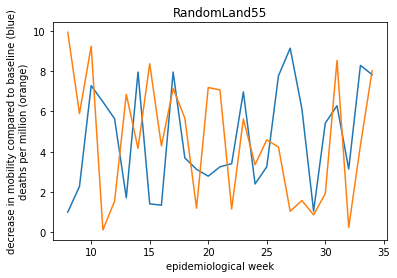

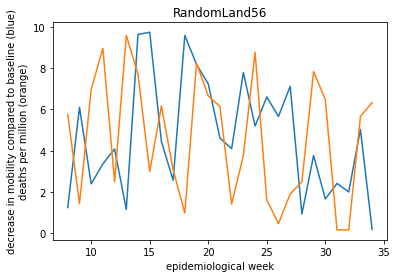

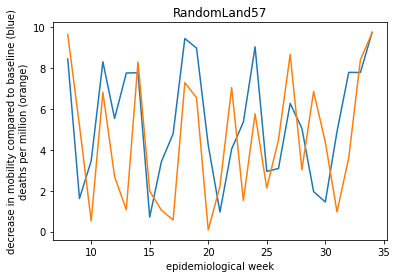

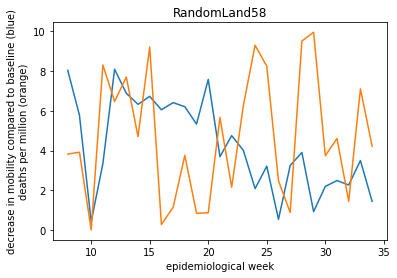

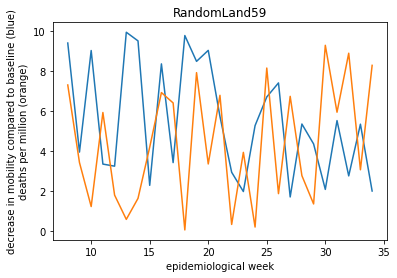

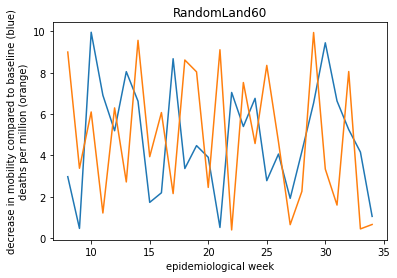

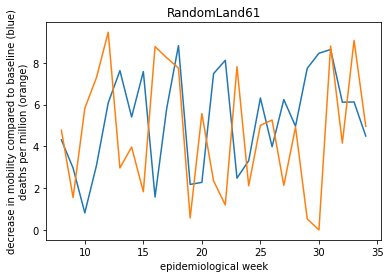

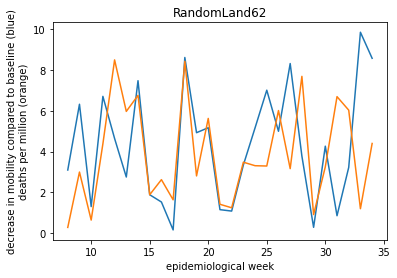

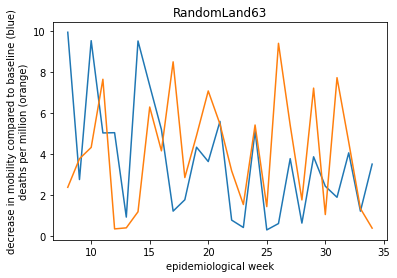

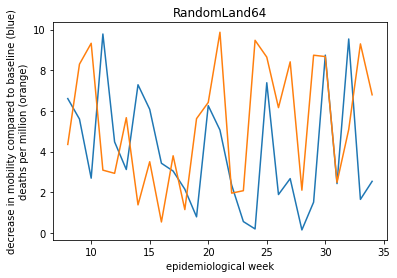

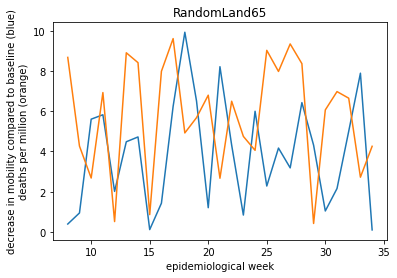

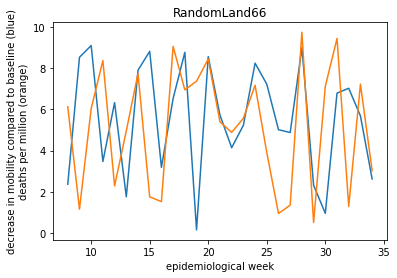

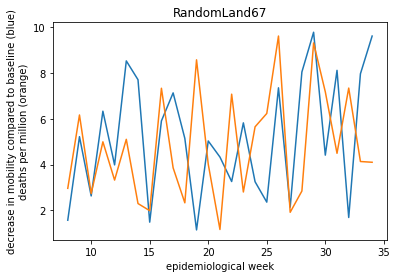

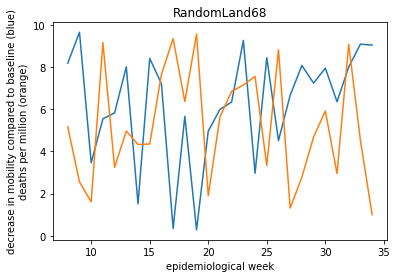

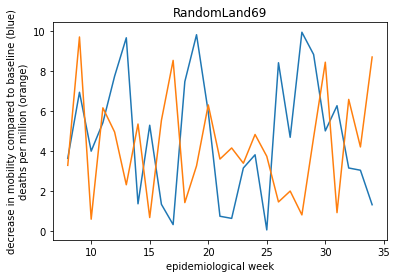

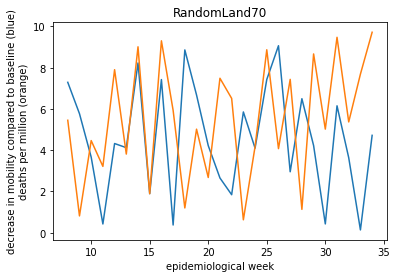

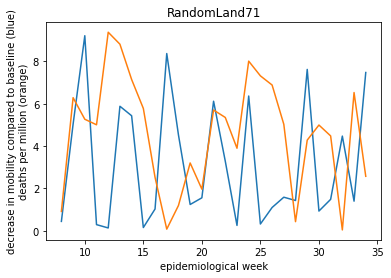

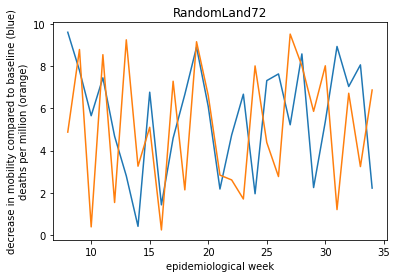

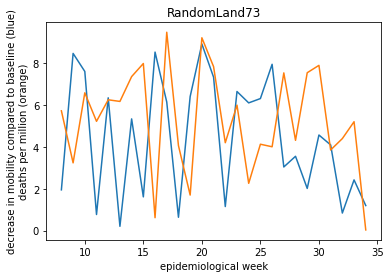

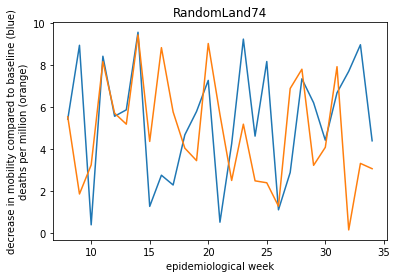

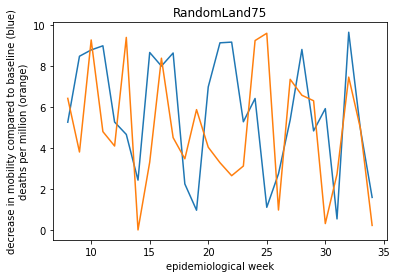

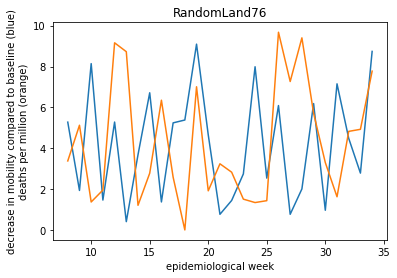

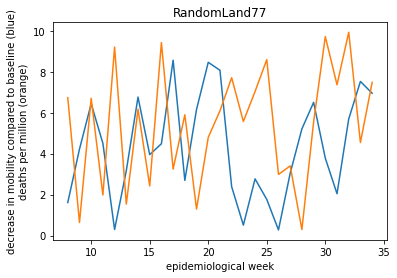

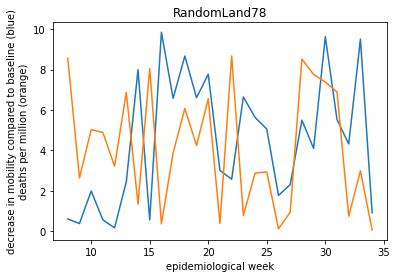

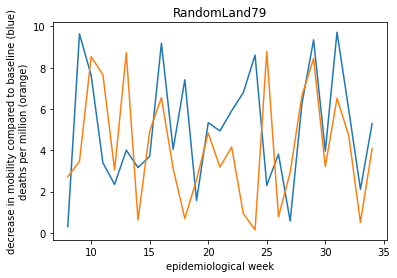

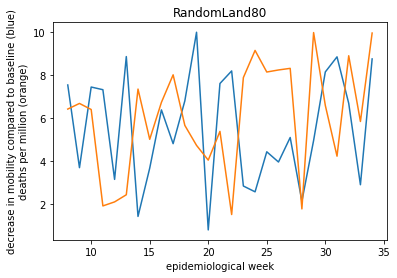

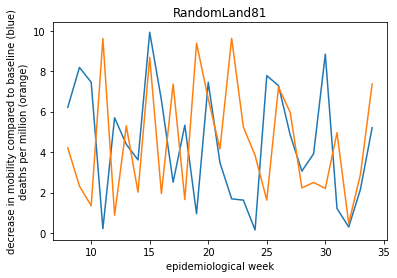

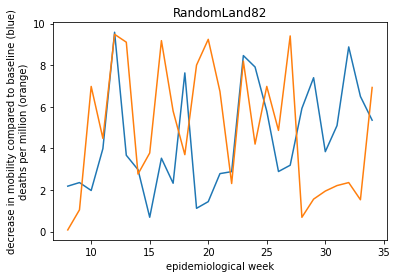

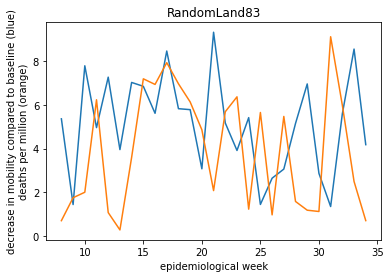

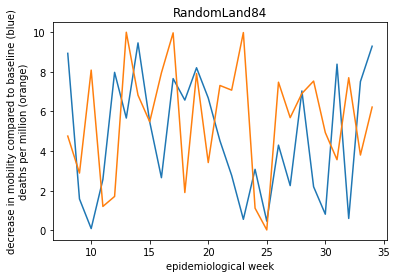

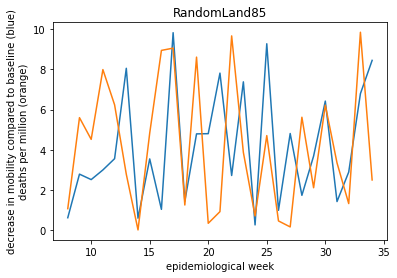

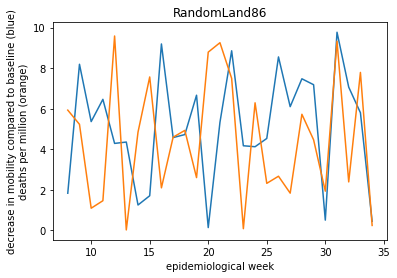

In [9]:
many_random_countries = []
for i in range(87):
    rand = make_country(f"RandomLand{i}", [(0,0), (26,0)], [(0,0), (26,0)], wobble=10)
    many_random_countries.append(rand)
df = pd.concat(many_random_countries)
df.to_excel(r'CovidSavaris_Test_87_countries_random_mobility_and_mortality.xlsx')

## Generate datasets by R.F. Savaris
According to R.F. Savaris, these (hypothetical) datasets represent two countries where reduction in moility obviously has an effect on mortality, and where the method by Savaris et al. returns a statistically significant correlation.

In [10]:
# Dataset obtained via email from R.F. Savaris
savaris1_data = {'name': "Savaris' Stay Inn Area",
            'mortality': [1000,1000,1010,960,912,866,823,782,742,705,670,637,605,
                     574,546,518,493,468,445,422,401,381,362,344,327,310,295],
            'mobility': [20,20,20,21,21,21,22,22,22,23,23,23,24,24,24,25,25,25,26,26,27,27,27,28,28,29,29]
                }

savaris2_data = {'name': "Savaris' Get Out Valley",
                 'mortality': [1000,1000,1005,1055,1108,1163,1222,1283,1347,1414,1485,1559,1637,
                     1719,1805,1895,1990,2089,2194,2303,2419,2540,2667,2800,2940,3087,3241],
                 'mobility': [-5,-5,-6,-6,-7,-7,-8,-9,-10,-11,-12,-13,-14,-16,-17,-19,-21,-23,-25,-28,-31,-34,-37,-41,-45,-49,-54]
                }  

savaris1_swapped_data = {'name': "Savaris' Stay Inn Area (swapped)",
            'mortality': [1000,1000,1010,960,912,866,823,782,742,705,670,637,605,
                     574,546,518,493,468,445,422,401,381,362,344,327,310,295],
            # from original get-out valley
            'mobility': [-5,-5,-6,-6,-7,-7,-8,-9,-10,-11,-12,-13,-14,-16,-17,-19,-21,-23,-25,-28,-31,-34,-37,-41,-45,-49,-54]
                }

savaris2_swapped_data = {'name': "Savaris' Get Out Valley (swapped)",
                 'mortality': [1000,1000,1005,1055,1108,1163,1222,1283,1347,1414,1485,1559,1637,
                     1719,1805,1895,1990,2089,2194,2303,2419,2540,2667,2800,2940,3087,3241],
                # from original stay-inn area
                'mobility': [20,20,20,21,21,21,22,22,22,23,23,23,24,24,24,25,25,25,26,26,27,27,27,28,28,29,29]         
                }  



def make_savaris(dataset, mobility_noise = 0, mortality_noise=0, mobility_offset=0, mortality_offset=0):
        name = dataset['name']
        if mobility_noise > 0 or mortality_noise > 0:
            name += " (+noise)"
        if mobility_offset > 0 or mortality_offset > 0:
            name += " (+offset)"
        epi_week = range(8,35)
        mortality = dataset['mortality'] + np.ones(27) * mortality_offset + np.random.rand(27) * mortality_noise
        mobility = dataset['mobility'] + np.ones(27) * mobility_offset + np.random.rand(27) * mobility_noise
        plt.plot(epi_week, mobility)
        plt.plot(epi_week, mortality)
        plt.ylabel("decrease in mobility compared to baseline (blue)\ndeaths per million (orange)")
        plt.xlabel("epidemiological week")
        plt.title(name)
        plt.savefig("images/" + name.replace("\n", " - ") + ".pdf", format="pdf")
        plt.show()
        #plt.scatter(mobility, mortality)
        #plt.show()
        country = [name] * 27
        df = pd.DataFrame(list(zip(country,epi_week,epi_week,mobility,mortality)), columns = ['location', 'epi-week', 'date', 'Stay-at-home', 'new_deaths_per_million'])
        return df

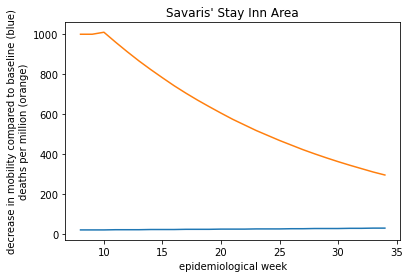

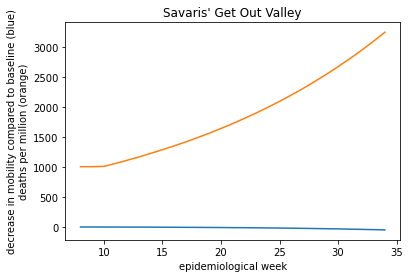

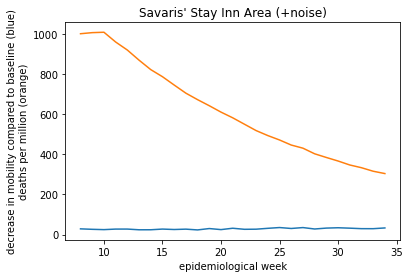

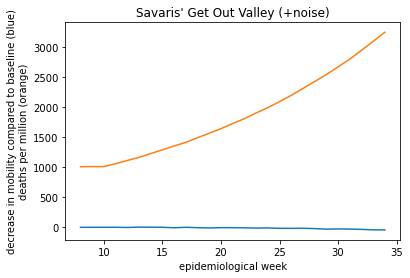

In [11]:
# original dataset
savaris1 = make_savaris(savaris1_data)
savaris2 = make_savaris(savaris2_data)
# dataset with a tiny bit of noise
savaris1a = make_savaris(savaris1_data, 10.0, 10.0)
savaris2a = make_savaris(savaris2_data, 10.0, 10.0)

# further experiments
#savaris1o = make_savaris(savaris1_data, 0,0, mobility_offset=0.0, mortality_offset=-1000.0)
#savaris2o = make_savaris(savaris2_data, 0,0, mobility_offset=0.0, mortality_offset=-1000.0)

#savaris1_swapped = make_savaris(savaris1_swapped_data)
#savaris2_swapped = make_savaris(savaris2_swapped_data)


In [12]:
df = pd.concat([savaris1, savaris2])
df.to_excel(r'CovidSavaris_Test_Savaris_PoC.xlsx')
df = pd.concat([savaris1a, savaris2a])
df.to_excel(r'CovidSavaris_Test_Savaris_PoC_noisy.xlsx')

## Generate countries with real death counts but lockdown-effect-confirming mobility data 

In [13]:
df_savaris_data = pd.read_excel('datasets/Compiled data Tables 1, 2.xlsx', 'DataForScript_CovidSavaris')
#!# replace incorrect timestamps in source data
if True:
    f13 = pd.Timestamp('2020-01-03 00:00:00')
    f31 = pd.Timestamp('2020-03-01 00:00:00')

    f23 = pd.Timestamp('2020-02-03 00:00:00')
    f32 = pd.Timestamp('2020-03-02 00:00:00')
    df_savaris_data = df_savaris_data.replace(f13,f31).replace(f23,f32)
    ## print(len(df[df['date'] == f13]))

In [14]:
# these are the only artificially generated countries with daily data instead of weekly data
# (because the original data contains *daily* deaths/mobility)
# this has no effect as the script by Savaris et al. aggregates daily data to weekly data

def make_real_artificial_country(country, approach='preceed'):
        data = df_savaris_data[df_savaris_data['location'] == country]
        day = data['date'].values
        epi_week = data['epi-week'].values
        mortality = data['new_deaths_per_million'].values
        orig_mobility = data['Stay-at-home'].values
        name = f"{country} with artificial mobility data"
        # generate matching mobility data
        mobility = preceed(mortality, country)
        #plt.plot(day, orig_mobility)
        plt.plot(day, mobility)
        plt.plot(day, mortality)
        plt.ylabel("decrease in mobility compared to baseline (blue)\ndeaths per million (orange)")
        plt.xlabel("day")
        plt.title(name)
        plt.savefig("images/countries_with_artificial_mobility/" + name.replace("\n", " - ") + ".pdf", format="pdf")
        plt.show()
        #plt.scatter(mobility, mortality)
        #plt.show()
        country = [name] * len(day)
        df = pd.DataFrame(list(zip(country,epi_week,day,mobility,mortality)), columns = ['location', 'epi-week', 'date', 'Stay-at-home', 'new_deaths_per_million'])
        return df
    
def preceed(mortality, country, offset_days=3*7):
    # exactly offset_days before a rise in mortality, mobility (stay-at-home-iness) falls and vice versa
    baseline = 0
    mob_max = 30
    mob_min = -5
    mort_max, mort_min = max(mortality), min(mortality)
    if not np.isnan(mortality[-1]): # some countries are missing the last entry
        mobility = np.concatenate((mortality[offset_days:], np.full(offset_days, mortality[-1])))
    else:
        mobility = np.concatenate((mortality[offset_days:-1], np.full(offset_days+1, mortality[-2])))
    #mobility = [-x*mob_max/mort_max for x in mobility] # scale to range 0 - mob_max
    mobility = [-x for x in mobility] # don't scale (values for mobility/mortality are already in same range)
    return mobility

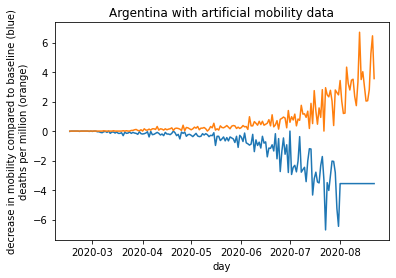

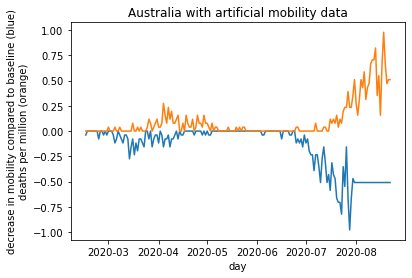

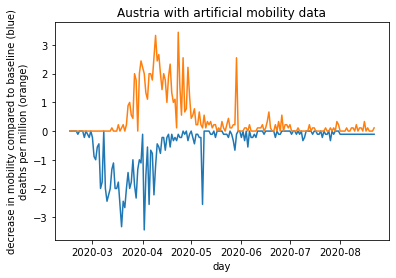

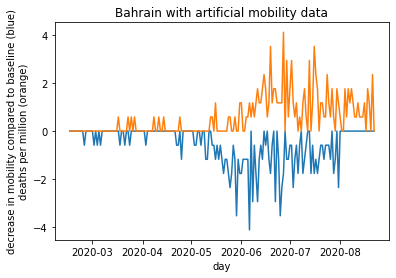

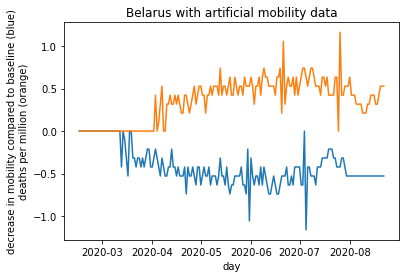

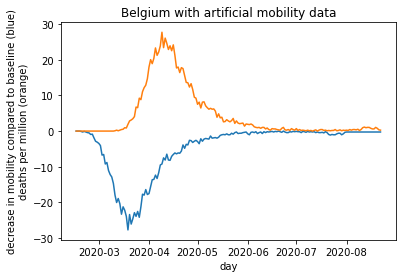

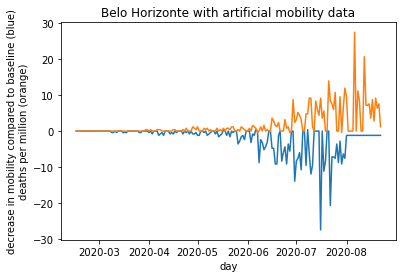

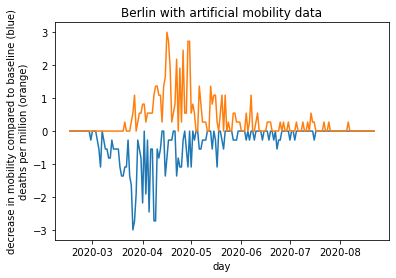

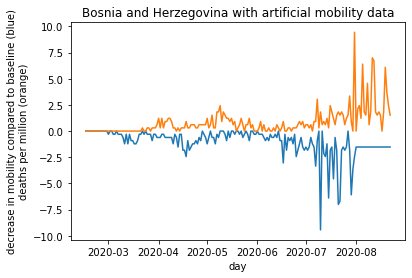

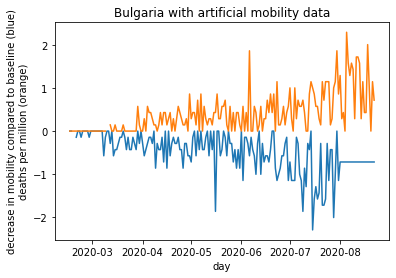

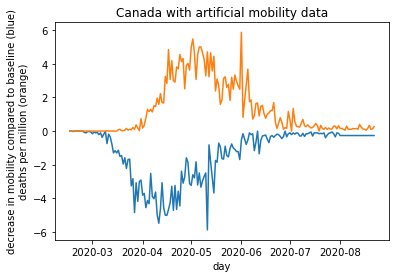

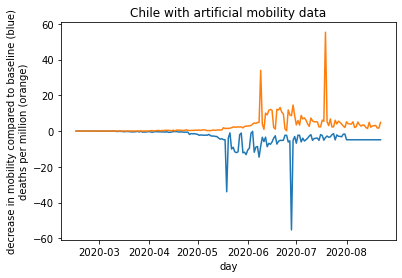

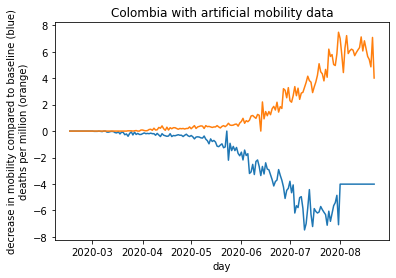

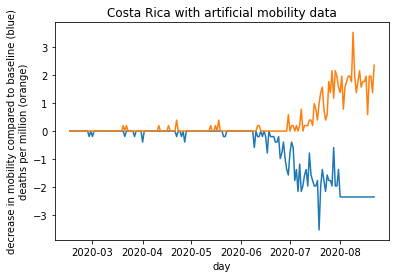

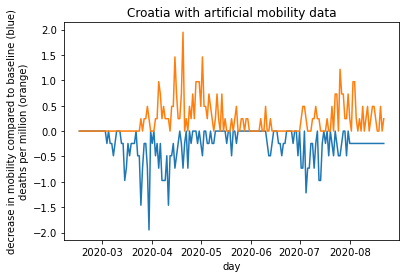

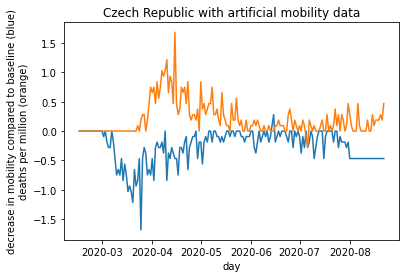

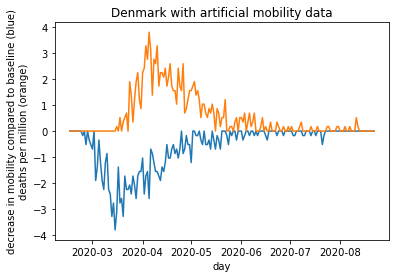

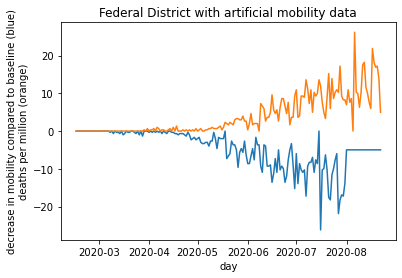

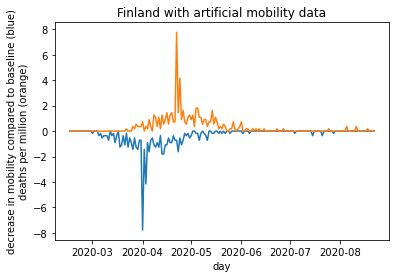

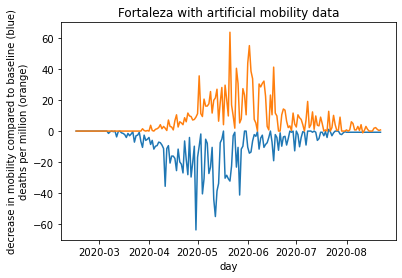

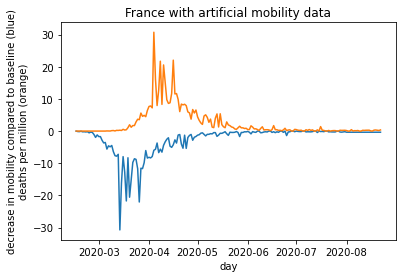

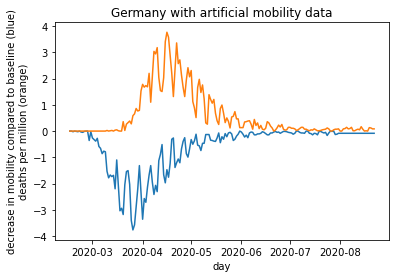

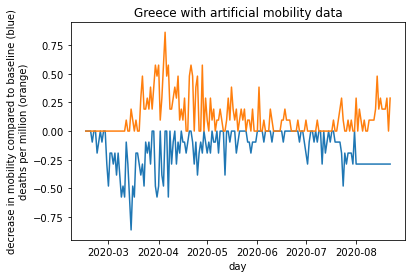

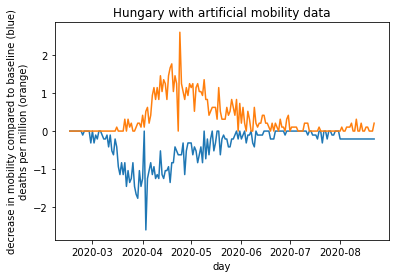

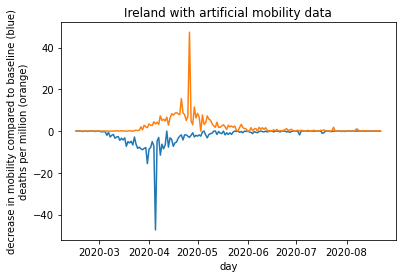

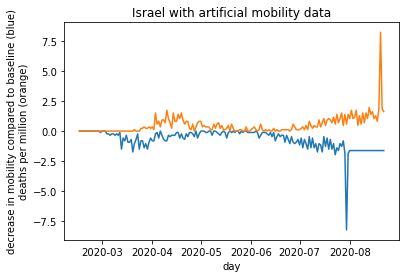

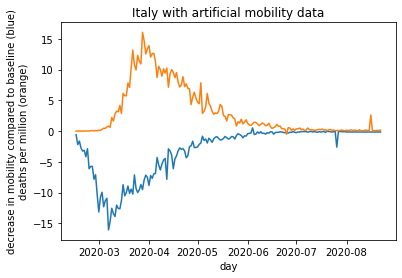

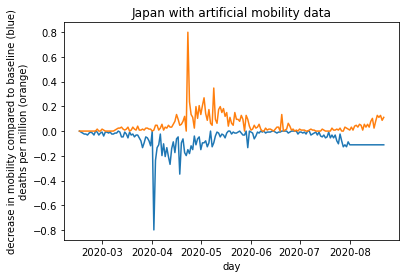

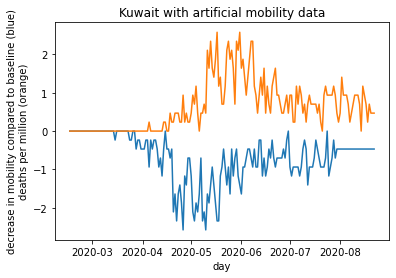

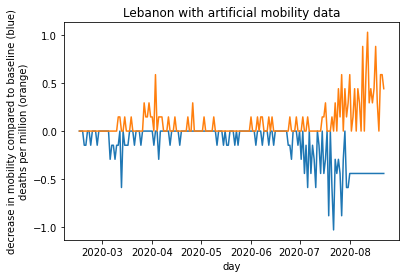

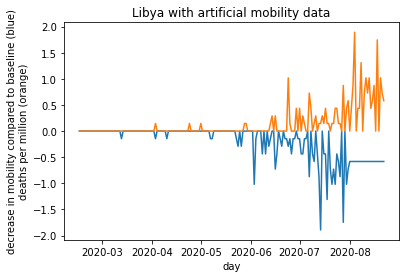

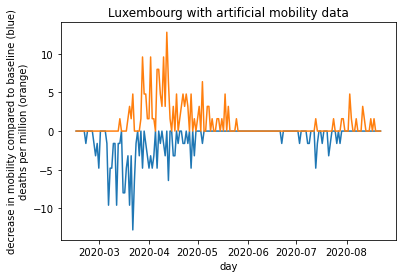

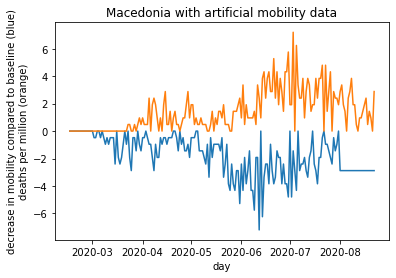

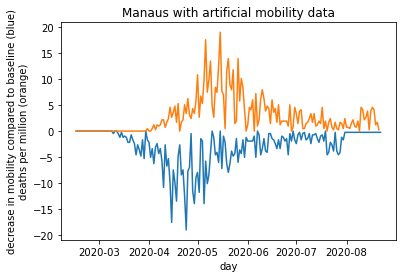

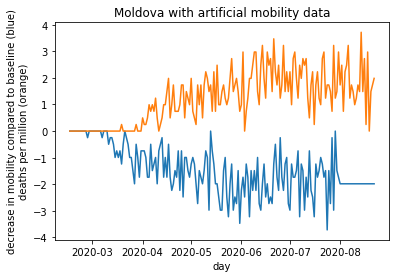

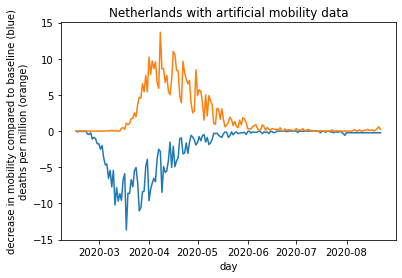

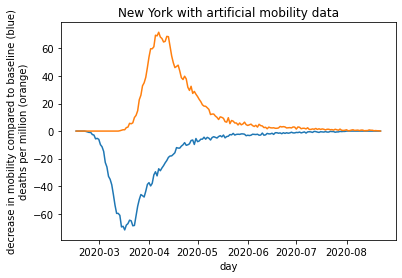

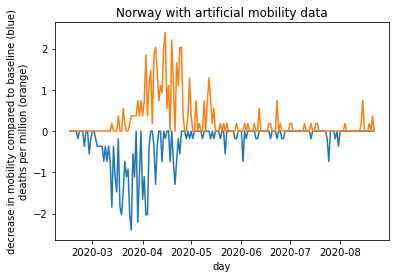

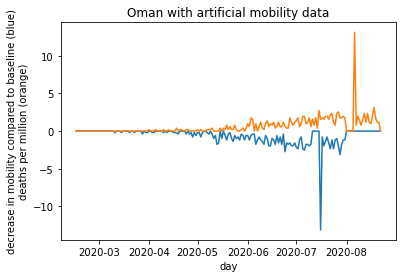

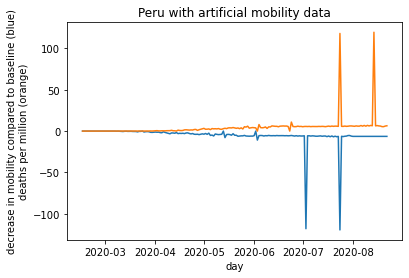

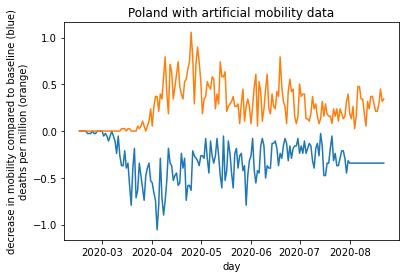

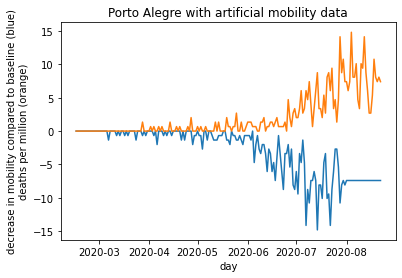

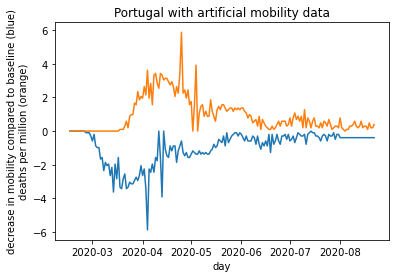

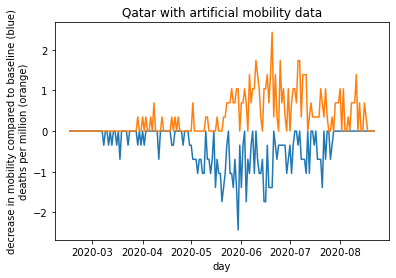

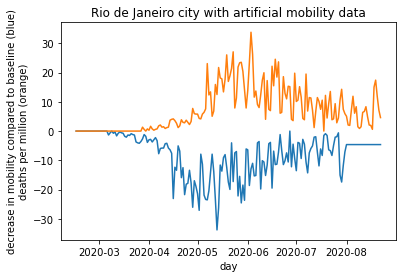

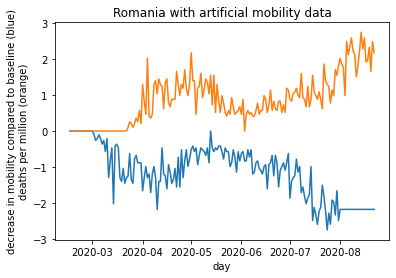

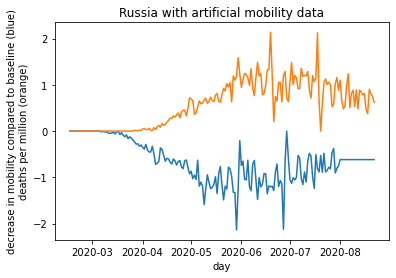

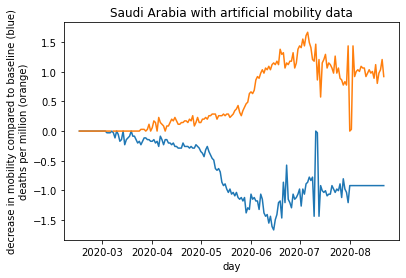

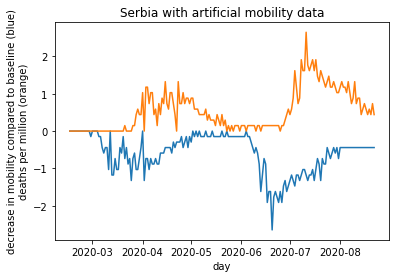

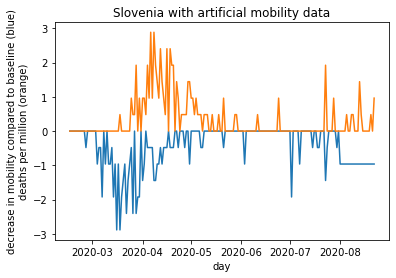

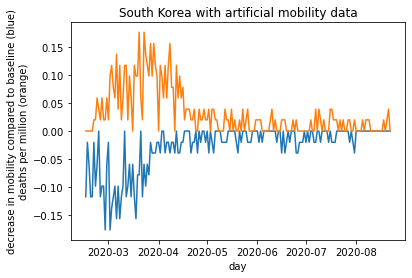

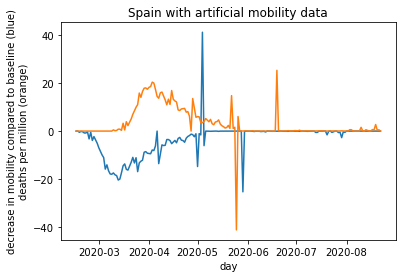

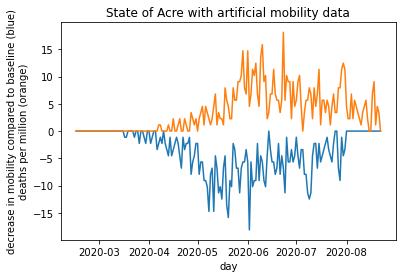

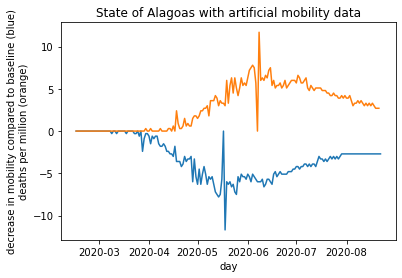

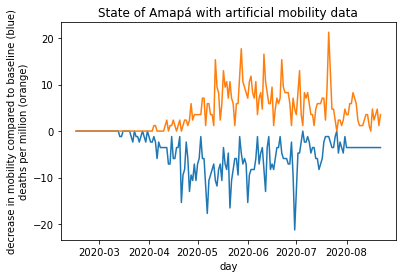

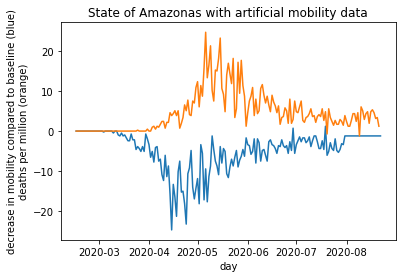

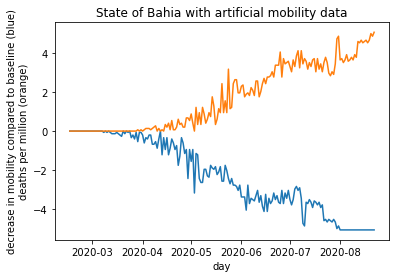

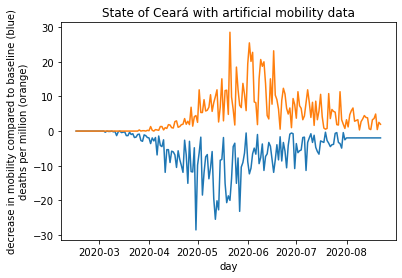

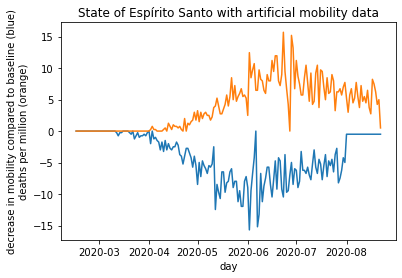

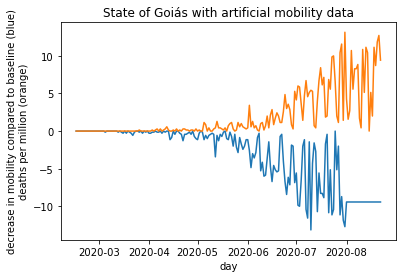

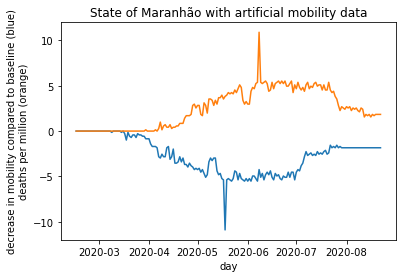

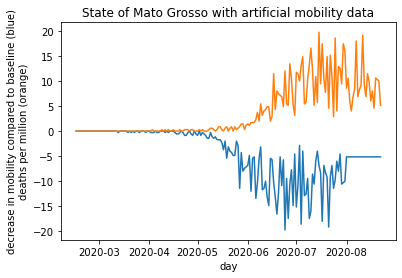

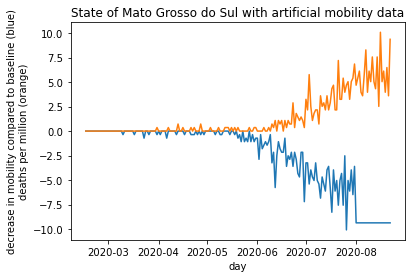

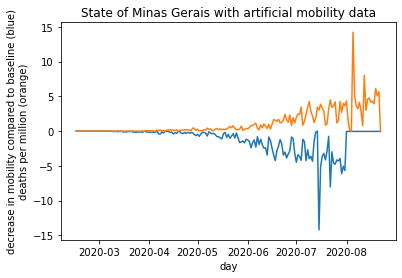

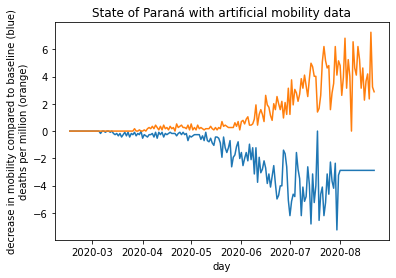

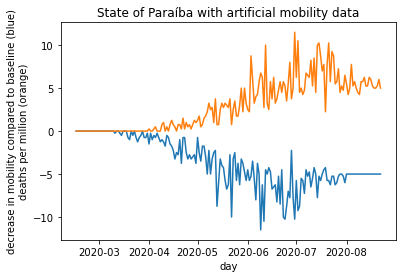

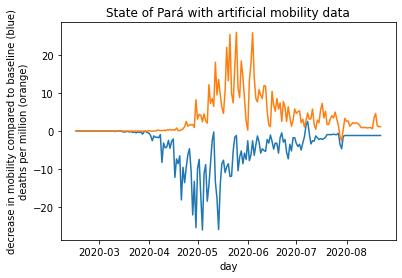

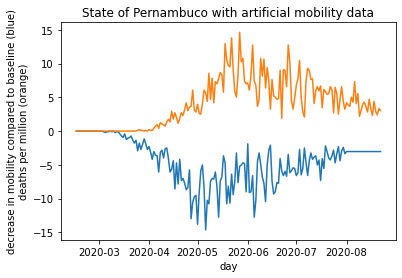

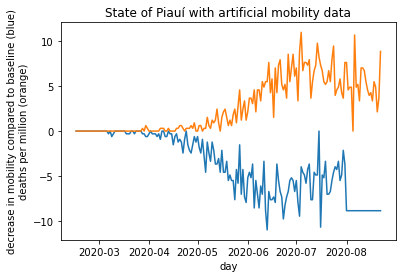

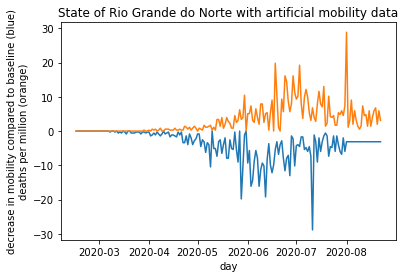

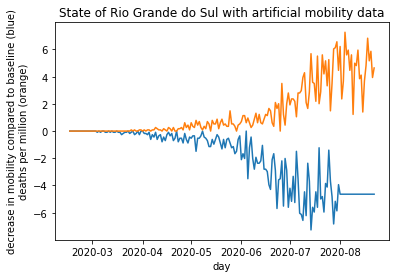

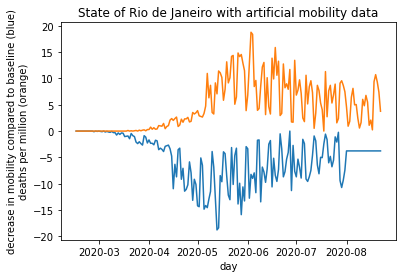

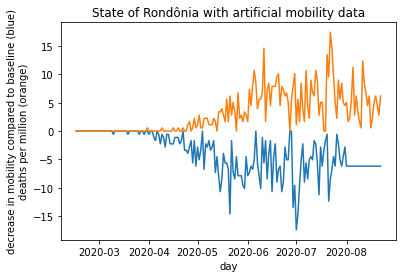

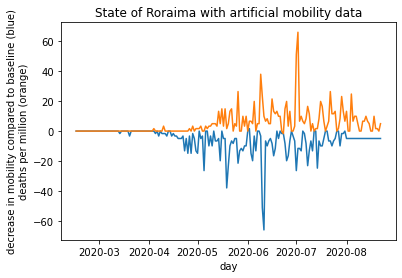

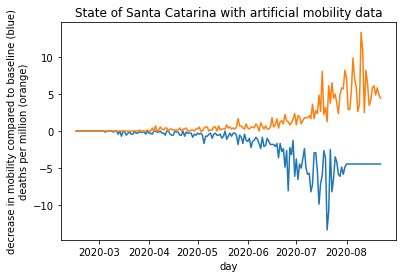

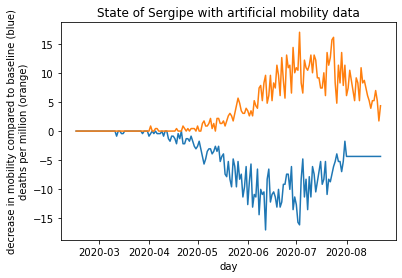

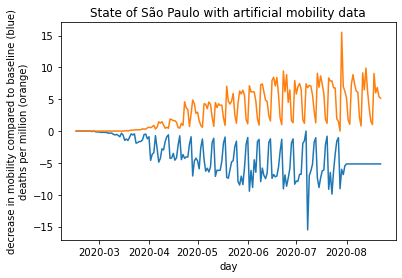

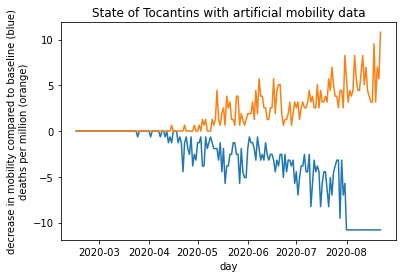

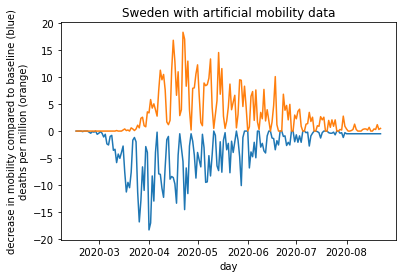

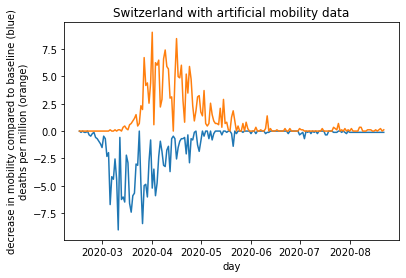

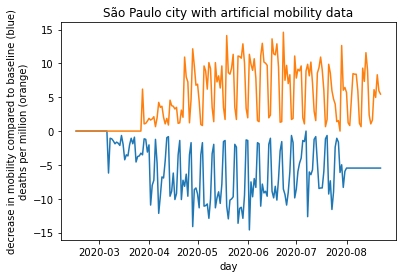

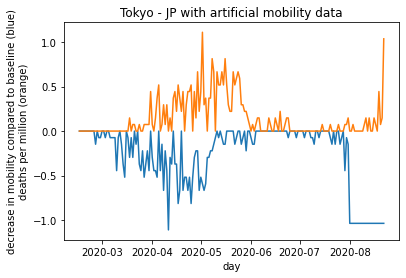

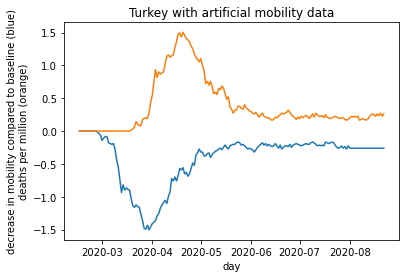

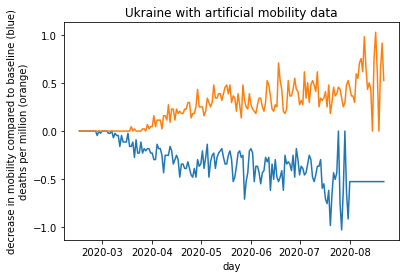

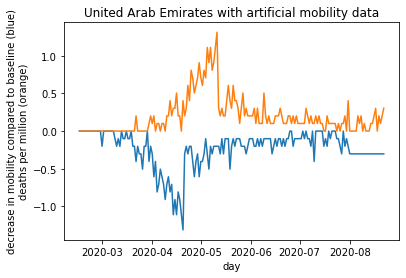

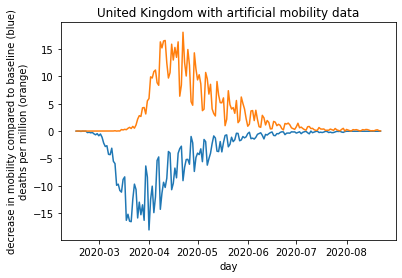

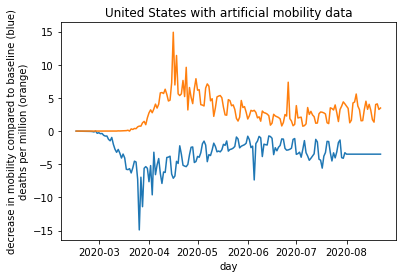

In [15]:
#germany = make_real_artificial_country("Germany")
#sweden = make_real_artificial_country("Sweden")
#italy = make_real_artificial_country("Italy")
#austria = make_real_artificial_country("Austria")

countries = sorted(list(set(df_savaris_data['location'].values)))
country_data = [make_real_artificial_country(country) for country in countries]

df = pd.concat(country_data)
df.to_excel(r'CovidSavaris_Test_real_mortality_with_matching_mobility.xlsx')

# Some experiments
The following experiments do not necessarily provide new insight. 
They are not necessary for the general claims

## Bonus: Regression

Calculate the regression according to Savaris et al. and perform test for null hypothesis.

> "The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis."
[source](https://blog.minitab.com/en/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients)

That means, that we test whether the slope is non-zero - i.e., that there is some correlation between (differences in) mobility/mortality.

**Attention**: This code returns slightly different p-values than the script by Savaris et al. (possibly due to differences in how the difference is calculated). This is just a convenience function to quickly check whether some correlation between two datasets should be expected.

In [16]:
# plot regression
def compare_two(df1, df2):
    plt.scatter(df1['Stay-at-home'], df1['new_deaths_per_million'])
    plt.xlabel("(negative) mobility compared to baseline")
    plt.ylabel("new deaths per million/week")
    plt.title(df1['location'][0])
    #plt.xlim(0,30)
    #plt.ylim(0,30)
    plt.show()
    plt.scatter(df2['Stay-at-home'], df2['new_deaths_per_million'])
    plt.xlabel("(negative) mobility compared to baseline")
    plt.ylabel("new deaths per million/week")
    plt.title(df2['location'][0])
    #plt.xlim(0,30)
    #plt.ylim(0,30)
    plt.show()
    #plt.scatter(df['Stay-at-home'].diff(), df['new_deaths_per_million'].diff())
    smooth_mob1, smooth_mort1 = df1['Stay-at-home'].diff(), df1['new_deaths_per_million'].diff()
    plt.scatter(smooth_mob1, smooth_mort1)
    plt.xlabel("change in (negative) mobility compared to last week")
    plt.ylabel("new deaths per million/week compared to last week")
    plt.title(df1['location'][0])
    #plt.xlim(0,30)
    #plt.ylim(0,30)
    plt.show()
    
    smooth_mob2, smooth_mort2 = df2['Stay-at-home'].diff(), df2['new_deaths_per_million'].diff()
    plt.scatter(smooth_mob2, smooth_mort2)
    plt.xlabel("change in (negative) mobility compared to last week")
    plt.ylabel("new deaths per million/week compared to last week")
    plt.title(df2['location'][0])
    #plt.xlim(0,30)
    #plt.ylim(0,30)
    plt.show()
    
    
    mob_diff = smooth_mob1 - smooth_mob2
    mob_diff = mob_diff.dropna()
    mort_diff = smooth_mort1 - smooth_mort2
    mort_diff = mort_diff.dropna()
    plt.scatter(mob_diff, mort_diff)
    mob_a = np.array(mob_diff) #this will convert a list in to an array
    mort_a = np.array(mort_diff)
    m,b = polyfit(mob_a, mort_a, 1) 
    plt.plot(mob_a, m*mob_a+b, '-r')
    x = sm.add_constant(mob_diff.values)
    res = sm.OLS(mort_diff,x).fit() 
    plt.xlabel("difference of change in (negative) mobility compared to previous week")
    plt.ylabel("difference of new deaths per million/week\ncompared to previous week")
    plt.title("%s - %s\n→ p = %.5f" % (df1['location'][0], df2['location'][0], res.pvalues[1]))
    plt.show()
    return res.pvalues[1]

In [17]:
compare_two(germany, austria)

NameError: name 'germany' is not defined

In [ ]:
p_x = compare_two(savaris1,savaris2)
print(f"p = {p_x:.6}")

In [ ]:
p_x = compare_two(savaris1a,savaris2a)
print(f"p = {p_x:.6}")

## Absolute COVID-19 deaths per week (and absolute mobility) does not matter for Savaris' algorithm

because we only use differences to last week


In [ ]:
p_x = compare_two(savaris1_swapped,savaris2_swapped)
print(f"p = {p_x:.6}")

## If we switch mobility data for both Savaris datasets, we still get a significant effect.
(That only means that Savaris algorithm at most can detect that there is no effect of lockdowns. If lockdowns would increase deaths, the algorithm would not detect this)

## Savaris' algo only shows effect if (most of the time), a high change in mortality is associated with a high change in mobility.
No concept of time delay!


significant correlation only if 

mort_a - mort_b continuously rising or falling
mob_a - mob_b continuously rising or falling

that means: 
mort_a rising faster than mort_b
or
mort_a rising and mort_b staying the same
or ...


(mort_a - mort_b) / (mob_a - mob_b) is rising/falling

hmmm


that means that if mobility stays same (mob_a = mob_b + 2) and mort_b stays same, mort_a must rise in order to see an effect of lockdowns


hmm



If "(mort_a - mort_b) / (mob_a - mob_b)" is significant, then
(10*mort_a - mort_b) / (mob_a - mob_b) is still significant

hmm?



Assumption:
is significant if
for most dates, (mort_a - mort_b) = n * (mob_a - mob_b) and "(mob_a - mob_b)" spans a range of values
if mob_b = 1: mob_a needs to increase
(comment: as mob_a and mob_b are only integers between ca. -5 and 15, there are only ca. 40 possible values for (mob_a - mob_b).



Arghhhh
Savaris does not look at changes in absolute values but changes in change!!
That means that for (mob_a - mob_b) to rise if mob_b stays the same, mob_a needs to rise exponentially.



In [ ]:
test1 = make_country("Test1", [(0,1), (26,100)], [(0,0), (26,100)], wobble=0.01)
test2 = make_country("Test2", [(0,1), (10,4), (18, 10), (26,100)], [(0,1), (26,1)], wobble=0.01)
p_x = compare_two(test1,test2)
print(f"p = {p_x:.6}")

### Observation
It does not make a difference for the algorithm whether only a country's mobility changes or whether only the mortality changes

In [ ]:
test1 = make_country("Mobility Change Land", [(0,0), (26,0)], [(0,0), (26,30)], wobble=0.01)
test2 = make_country("Mortality Change Land", [(0,0), (26,30)], [(0,0), (26,0)], wobble=0.01)
compared_to = make_country("Test2", [(0,0), (26,0)], [(0,0), (26,0)], wobble=0.01)
p_x = compare_two(test1,compared_to)
print(f"p = {p_x:.6}")
p_x = compare_two(test2,compared_to)
print(f"p = {p_x:.6}")